# Pandas

Powerful tool for large excel-ish files inspection

## load csv file

In [60]:
import pandas as pd
RM_dataFrame = pd.read_csv("RM_9.csv",header=2,names = ('From Paper Index', 'Country', 'City, Location', 'Rock Classification',
       'Rock Type', 'Lithology', 'RQD', 'RMR76', 'RMR_89', 'Q', 'GSI',
       'Ei (GPa) (intact rock)', 'Em (GPa)', 'Eem (GPa)', 'Edm (GPa)',
       'σci (MPa) (intact rock)', 'Em test type')) ## read in the file into DataFrame (pandas object)
RM_dataFrame ## look at whole file

,From Paper Index,Country,"City, Location",Rock Classification,Rock Type,Lithology,RQD,RMR76,RMR_89,Q,GSI,Ei (GPa) (intact rock),Em (GPa),Eem (GPa),Edm (GPa),σci (MPa) (intact rock),Em test type
0,1,Jordan,Wadi Mujib,Sedimentary,limestone,NaN,37.0,NaN,52,2.8,NaN,NaN,NaN,NaN,5.8,NaN,NaN
1,1,Jordan,Wadi Mujib,Sedimentary,"Limestone, Marl, Shale",NaN,37.0,NaN,52,4.6,NaN,NaN,NaN,NaN,1.8,NaN,NaN
2,1,Jordan,Wadi Mujib,Sedimentary,limestone,NaN,38.0,NaN,48,4.8,NaN,NaN,NaN,NaN,2.9,NaN,NaN
3,1,Jordan,Wadi Mujib,Sedimentary,"Limestone, Marly limestone, Marl",NaN,40.0,NaN,54,5.0,NaN,NaN,NaN,NaN,6.8,NaN,NaN
4,1,Jordan,Wadi Mujib,Sedimentary,"Limestone, Marl, Shale",NaN,46.0,NaN,52,5.8,NaN,NaN,NaN,NaN,6.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,231,Iran,Masjed-Soleiman hydroelectric power station,Sedimentary,Conglomerate,NaN,NaN,NaN,74,53.0,NaN,15.0,NaN,NaN,NaN,60,NaN
6232,231,Iran,Masjed-Soleiman hydroelectric power station,Sedimentary,Sandstone,NaN,NaN,NaN,74,20.0,NaN,7.0,NaN,NaN,NaN,60,NaN
6233,231,Iran,Masjed-Soleiman hydroelectric power station,Sedimentary,Siltstone,NaN,NaN,NaN,62,4.7,NaN,6.0,NaN,NaN,NaN,40,NaN
6234,231,Iran,Masjed-Soleiman hydroelectric power station,Sedimentary,Clavstone,NaN,NaN,NaN,50,1.6,NaN,6.0,NaN,NaN,NaN,25,NaN


## check column and row

In [ ]:
pd.__version__

In [ ]:
RM_dataFrame["RQD"] # look at a single column (known as series)
import matplotlib.pyplot as plt
plt.hist(RM_dataFrame["RQD"])

Notice:
Here loc is followed by square brackets <font color='blue'>`[` `]`</font>

In [ ]:
RM_dataFrame.loc[RM_dataFrame["Rock Classification"] == "Sedimentary",("RQD","Q","GSI")] # look at more columns

In [ ]:
RM_dataFrame.columns # look at columns of the dataframe

In [ ]:
RM_dataFrame[21:26] # select 22nd to 57th rows

In [ ]:
RM_dataFrame[21:26]

## know your data from a big picture

In [ ]:
RM_dataFrame.info() # check valid number counts and datatype

In [ ]:
# RM_dataFrame["RMR89"].info()
# RM_dataFrame["RMR89"].astype("float")
# pd.to_numeric(RM_dataFrame["RMR89"],errors='coerce').info()
plt.hist(pd.to_numeric(RM_dataFrame["RMR89"],errors='coerce'))

In [ ]:
plt.scatter(RM_dataFrame["Q"],RM_dataFrame["RQD"])
plt.xscale("log")
plt.xlabel("Q")
plt.ylabel("RQD")

In [ ]:
RM_dataFrame.loc[1049:1060,"σci (MPa) (intact rock)"]
# RM_df2 = RM_dataFrame.loc[RM_dataFrame.select_dtypes(include=['float','int'])["σci (MPa) (intact rock)"],:]

<font size=4 color="blue">**Note:**</font>

Pay attention to:
1. `Column`: compare the listed parameters with those in the table from `describe()` below
2. `Non-Null Count`:  get a sense of the missing data distribution.
3. `Dtype` (data type): you may need to convert them to float of int before further manipulation. `object` espeically, they can be text, mixture of dtype, etc.
<br>*How to make use of these data?* <font size=1>Answers will be shown in next Monday's lecture! </font>


In [ ]:
RM_dataFrame.describe() # summary statistics of the dataframe

## Check specific statistic index

### pandas style (object-wise)

In [ ]:
RM_dataFrame.loc?

In [ ]:
RM_dataFrame["Ei (GPa) (intact rock)"].max() # get max value of the column

In [ ]:
RM_dataFrame.iloc[RM_dataFrame["Ei (GPa) (intact rock)"].argmax(), :]

Note:

* The `.iloc[]` reads integers
* The `.loc[]` reads *boolean list* or *list of text*, usually used when selecting with conditions

Ref:
* {[Official doc: iloc](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.iloc.html)}
* {[Official doc: loc](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.loc.html)}

### numpy style (process-wise)

In [ ]:
import numpy as np
np.max(RM_dataFrame["Ei (GPa) (intact rock)"]) #look for max intact Young's modulus Ei

In [ ]:
RM_dataFrame.loc[int(np.argmax(RM_dataFrame["Ei (GPa) (intact rock)"])),:] #show row corresponding to maximum Ei

## Conditional selection/ Filter

In [ ]:
RM_dataFrame.loc[RM_dataFrame["Ei (GPa) (intact rock)"] > 100,:] # select rows with Ei > 100 GPa

In [ ]:
RM_dataFrame.loc[RM_dataFrame["Ei (GPa) (intact rock)"] > 100,:].count() # count number of rows with Ei > 100 GPa

In [ ]:
RM_dataFrame.dropna(axis=0, how="any") # drop axis=1 (columns) with "any" NA (not applicable)

In [ ]:
RM_dataFrame.dropna(axis=0, how="any") #show rows with complete data in ALL columns

In [ ]:
RM_dataFrame[RM_dataFrame["Q"].notna()] #show rows where Q is not missing

In [ ]:
RM_dataFrame["try_something"] = 0
for row_index in range(0,len(RM_dataFrame)-1):
  row_Q = RM_dataFrame.loc[row_index:row_index+1,("Q","RMR_89")]
  # RM_dataFrame.loc[row_index,"try_something"] = row_Q[0] + 5
  # print(row_Q)
print(row_Q.type)

In [ ]:
import pandas as pd
RM_dataFrame = pd.read_csv("RM_9.csv")
print(len(RM_dataFrame))
RM_dataFrame = RM_dataFrame.dropna(axis=0,thresh=10)
RM_dataFrame = RM_dataFrame.reset_index()
print((RM_dataFrame))

In [ ]:
RM_dataFrame.to_csv("RM_9_small.csv")

# Visualization

Always examine your dataset before feeding it to Machine Learning models.

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(RM_dataFrame["RMR76"],RM_dataFrame["GSI"])
plt.xlabel("RMR76")
plt.ylabel("GSI")

# Machine Learning automatically
No more math equations!

Package: sklearn

In [82]:
## for plotting
import numpy as np
import matplotlib.pyplot as plt
def plotRM(X,Y, clf):
  np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
  xx1, xx2 = np.meshgrid(np.linspace(np.min(X[:,0]),np.max(X[:,0]),100), np.linspace(np.min(X[:,1]),np.max(X[:,1]),100))
  Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]) # column stack the flattened meshgrid array
  Z = Z.reshape(xx1.shape)
  color_dict = { 'Igneous':'red', 'Sedimentary':'blue', 'Metamorphic':'green'}
  plt.scatter(xx1.flatten(), xx2.flatten(), color=[ color_dict[i] for i in Z.flatten() ], alpha=0.1)
  plt.scatter(X[:,0], X[:,1], color=[ color_dict[i] for i in Y ], edgecolor='k')
  plt.xlabel("Q")
  plt.ylabel("Em (GPa)")
  return


# Classification

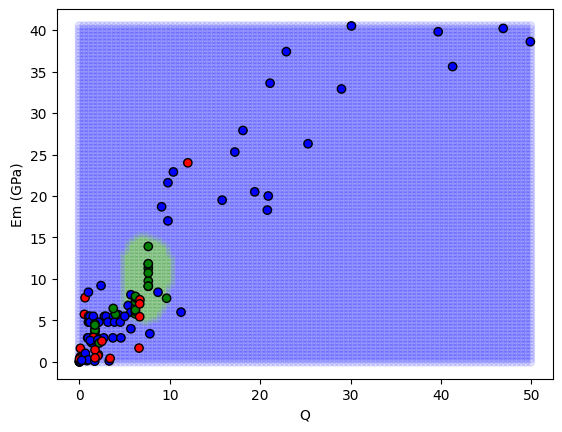

In [114]:
from sklearn import svm ## now we introduce sci-kit-learn for basic machine learning!
QA_RM = RM_dataFrame[RM_dataFrame["Q"].notna() & RM_dataFrame["Rock Classification"].notna() & RM_dataFrame["Em (GPa)"].notna()] ##only keep rows with known Q, classification, Em
# QA_RM.info()
X = QA_RM.loc[:, ("Q", "Em (GPa)")].to_numpy() #convert inputs to numpy
Y = QA_RM.loc[:, ("Rock Classification")].to_numpy() #same for outputs
# clf = svm.SVC() # select support vector classification
# clf = svm.SVC(kernel='poly', degree=2) # 2nd order polynomial SVM
# clf = svm.SVC(kernel='poly', degree=5) # 5th order polynomial SVM
# clf = svm.SVC(kernel='rbf') ## radial basis function SVM
# clf = svm.SVC(kernel='linear') ## linear SVM
# clf = svm.SVC(kernel='rbf', C = 1) ## play with hyper-parameter C
# clf = svm.SVC(kernel='rbf', gamma = 0.7) ## play with hyper-parameter gamma (sigma)
clf = svm.SVC(kernel='rbf', gamma = 0.1) ## play with hyper-parameter gamma (sigma)
clf.fit(X, Y) #train model

xx1, xx2 = np.meshgrid(np.linspace(np.min(X[:,0]),np.max(X[:,0]),100), np.linspace(np.min(X[:,1]),np.max(X[:,1]),100))
xx1.shape
plotRM(X,Y, clf)

(array([15.,  0.,  0.,  0.,  0., 69.,  0.,  0.,  0., 29.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

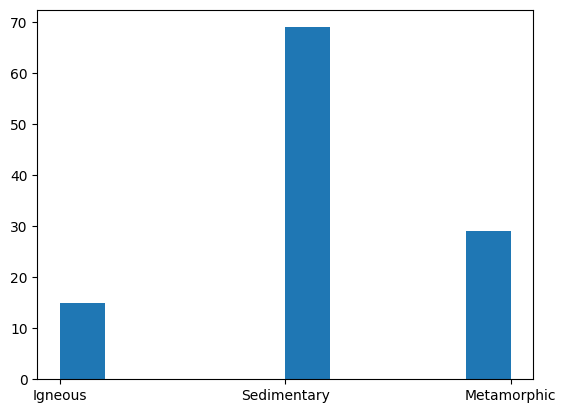

In [112]:
plt.hist(Y)

Text(0, 0.5, 'loss')

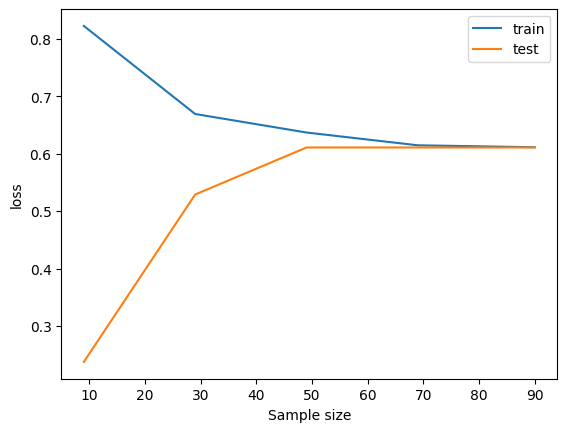

In [85]:
from sklearn.model_selection import learning_curve # plot learning curve. note this is with dataset size, not epochs
# clf = svm.SVC(kernel='poly', degree=2) # 2nd order polynomial SVM
# clf = svm.SVC(kernel='poly', degree=5) # 5th order polynomial SVM
# clf = svm.SVC(kernel='rbf') ## radial basis function SVM
clf = svm.SVC(kernel='linear') ## linear SVM
# clf = svm.SVC(kernel='rbf', C = 5) ## play with hyper-parameter C
train_sizes, train_scores, test_scores  = learning_curve(clf, X, Y, shuffle=True)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='test')
plt.legend()
plt.xlabel("Sample size")
plt.ylabel("loss")

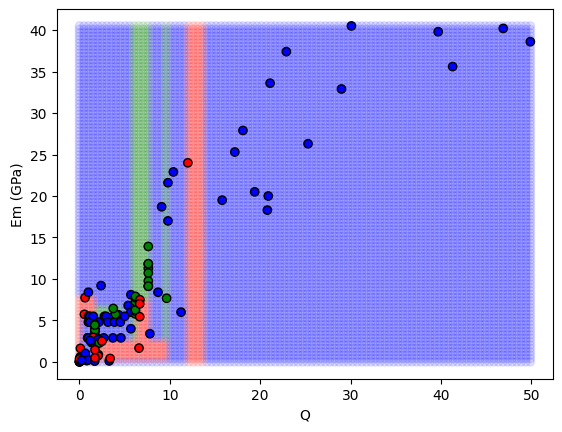

In [81]:
from sklearn import tree
# clf = tree.DecisionTreeClassifier(criterion="entropy") #try decision tree
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth = 10000) #try different max depth
clf = clf.fit(X, Y) #train the tree

plotRM(X,Y, clf) #

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf) ##visualise the tree

# Regression

In [104]:
# Plotter
def plotReg(clf,X,Y):
  Z = clf.predict(X)

  plt.figure()
  plt.scatter(X[:,1],Y,label='true')
  plt.scatter(X[:,1],Z,label='predicted')
  plt.xlabel("RMR89")
  plt.ylabel("Em (GPa)")
  plt.legend()
  plt.figure()
  plt.scatter(X[:,0],Y,label='true')
  plt.scatter(X[:,0],Z,label='predicted')
  plt.xlabel("Q")
  plt.ylabel("Em (GPa)")
  plt.legend()
  plt.figure()
  plt.scatter(X[:,1],Y - Z,label='true - predicted')
  plt.xlabel("RMR89")
  plt.ylabel("Em (GPa)")
  plt.legend()
  plt.figure()
  plt.scatter(X[:,0],Y - Z,label='true - predicted')
  plt.xlabel("Q")
  plt.ylabel("Em (GPa)")
  plt.legend()
  plt.figure()
  plt.plot([0, 50], [0,50])
  plt.scatter(Y,Z)
  plt.xlabel("True Em (GPa)")
  plt.ylabel("Predicted Em (GPa)")
  return

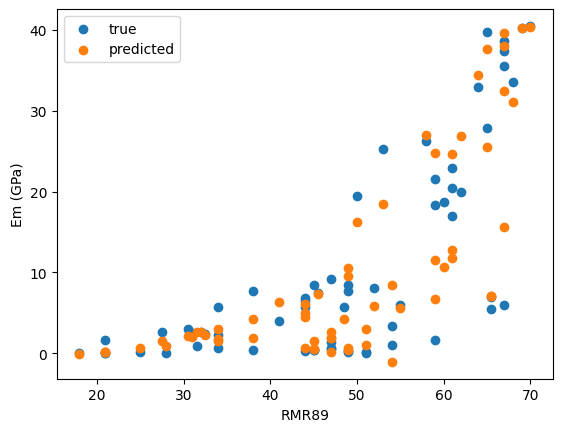

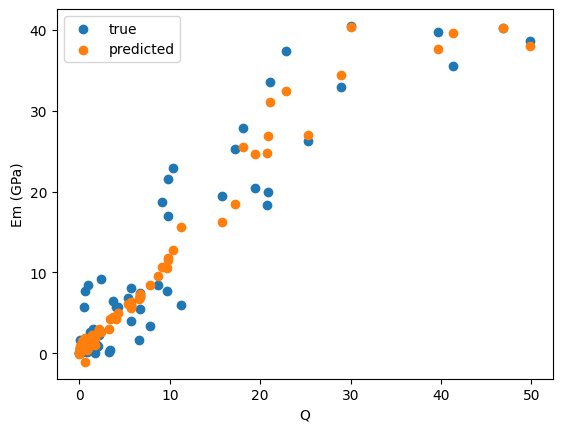

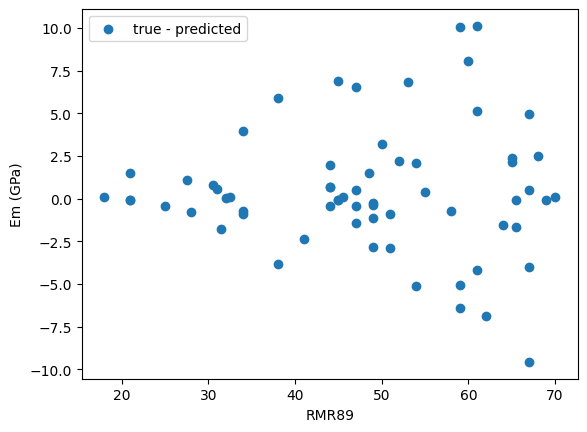

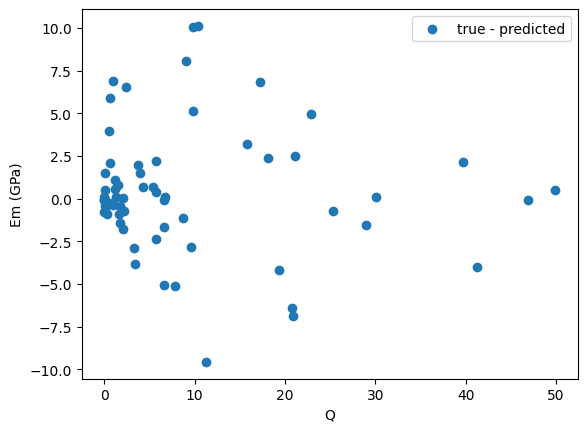

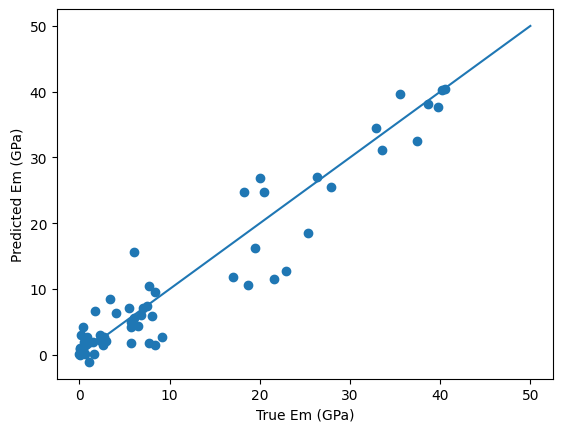

In [115]:
QRMRE_RM = RM_dataFrame[RM_dataFrame["Q"].notna() & RM_dataFrame["RMR_89"].notna() & RM_dataFrame["Em (GPa)"].notna()] ##only keep rows with known Q, classification, Em
# QA_RM.info()
X = QRMRE_RM.loc[:, ("Q", "RMR_89")].to_numpy().astype('float') #convert inputs to numpy
Y = QRMRE_RM.loc[:, ("Em (GPa)")].to_numpy() #same for outputs
# clf = svm.SVR() # select support vector classification
# clf = svm.SVR(kernel='poly', degree=2) # 2nd order polynomial SVM
# clf = svm.SVR(kernel='poly', degree=5) # 5th order polynomial SVM
# clf = svm.SVR(kernel='rbf') ## radial basis function SVM
# clf = svm.SVR(kernel='linear') ## linear SVM
clf = svm.SVR(kernel='rbf', C = 100) ## play with hyper-parameter C
# clf = svm.SVR(kernel='rbf', gamma = 0.7) ## play with hyper-parameter gamma (sigma)
# clf = svm.SVR(kernel='rbf', gamma = 0.1) ## play with hyper-parameter gamma (sigma)
# clf = tree.DecisionTreeRegressor(criterion='squared_error',max_depth=2)
clf.fit(X, Y) #train model
plotReg(clf,X,Y)

In [118]:
from sklearn.metrics import r2_score, mean_squared_error

# r2_score(Y, clf.predict(X))
np.sqrt(mean_squared_error(Y,clf.predict(X)))

3.6916442761078874

In [ ]:
X.astype('float')

## Exercise: try the same as above for the soil database :)